ADF P-değeri: 7.489948576551347e-16
Fark alınmadı çünkü seri zaten durağan.


NameError: name 'ts' is not defined

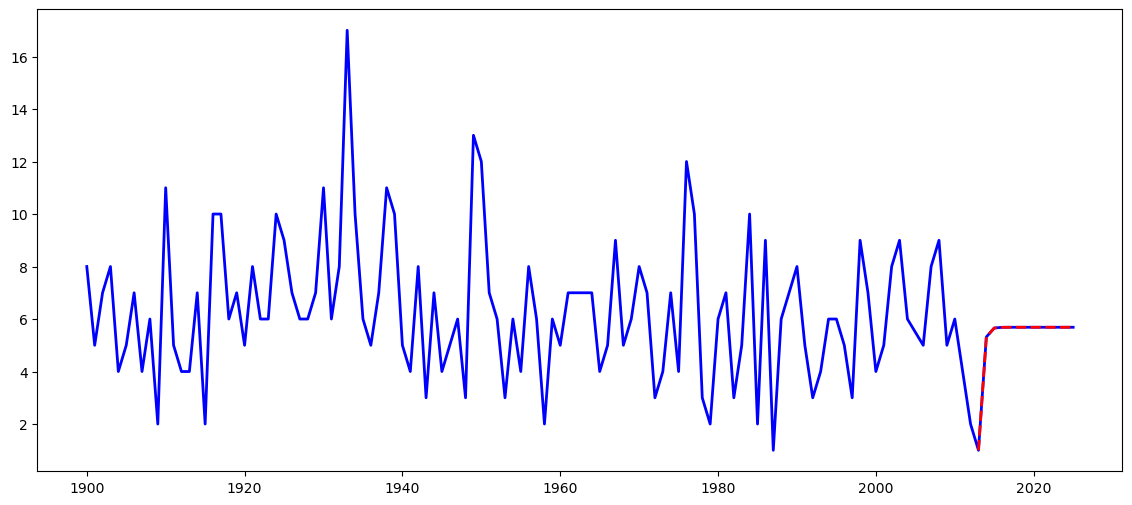

<Figure size 1200x600 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA #Zaman serisi modeli kurmak için.
from statsmodels.tsa.stattools import adfuller #Durağanlık (stationarity) testi için.

# --- CSV Dosyasını Yükle ve Yılı Temizle ---
veri = pd.read_csv("meteorite-landings.csv") #CSV dosyasını oku, veri çerçevesi oluştur.

# Yıl sütununu sayıya çevir ve eksik olanları at
veri["yil"] = pd.to_numeric(veri["year"], errors="coerce") #Yıl sütunu metinse sayıya çevir (to_numeric).
veri = veri.dropna(subset=["yil"]) #Hatalı ya da boş verileri at.
veri["yil"] = veri["yil"].astype(int) #tamsayıçevir

# Sadece 'Fell' olanlar ve 1900 sonrası için filtrele
veri = veri[(veri["fall"] == "Fell") & (veri["yil"] >= 1900)] #sadece düşenleri, 1900 sonrası

# --- Yıllara Göre Göktaşı Sayısını Hesapla ---
yillik_sayilar = veri.groupby("yil").size() #Her yıl için kaç göktaşı düşmüş, onu say ve seriye dönüştür.
yillik_sayilar.index = pd.PeriodIndex(yillik_sayilar.index, freq="Y") #Zaman serisi modellemesi için indexi yıllık olarak ayarla#sadece sayı değil
#İndex'i zaman serisine uygun hale getir (PeriodIndex), bu sayede zaman serisi modellemesi yapılabilir.

# --- Durağanlık Testi --- ARIMA sadece durağan serilerle çalışır
adf_sonuc = adfuller(yillik_sayilar) #ADF testi ile serinin durağan (istatistiksel olarak değişkenliği sabit) olup olmadığını kontrol et.
print("ADF P-değeri:", adf_sonuc[1]) #P-değeri < 0.05 ise seri durağandır.

if adf_sonuc[1] > 0.05:  #Durağan değilse seride “fark” alarak durağanlaştır.
    print("Fark alındı çünkü seri durağan değil.")  
    seri = yillik_sayilar.diff().dropna()
else:
    print("Fark alınmadı çünkü seri zaten durağan.")  #Durağansa seriyi aynen kullan.
    seri = yillik_sayilar

# --- ARIMA Modeli Kur ve Eğit ---
model = ARIMA(yillik_sayilar, order=(1, 1, 1)) #Farklı parametrelerle model çıktısı ve tahminler değişebilir.Bir gecikmeli değerler dikkate alınıyor
model_sonuc = model.fit()

# --- Kaç Yıl İleriye Tahmin Yapılacak? ---
tahmin_sayisi = 2025 - yillik_sayilar.index[-1].year
if tahmin_sayisi <= 0:
    tahmin_sayisi = 5  # Öylesine 5 yıl ileri tahmin et

# --- Tahmin Yap ---
tahmin = model_sonuc.forecast(steps=tahmin_sayisi) #n yıl ileriye tahmin yap.
tahmin_yillari = pd.period_range(start=yillik_sayilar.index[-1]+1, periods=tahmin_sayisi, freq="Y")
tahmin.index = tahmin_yillari

# --- Grafik: Gerçek ve Tahmin ---
# Tüm yıllar ve değerleri birleştir (gerçek + tahmin)
tum_yillar = yillik_sayilar.index.to_timestamp().tolist() + tahmin.index.to_timestamp().tolist()
tum_degerler = yillik_sayilar.values.tolist() + tahmin.values.tolist() #Grafik için gerçek ve tahmin edilen yılları birleştir.

plt.figure(figsize=(14, 6))
# Tüm seriyi tek çizgiyle çiz (mavi)
plt.plot(tum_yillar, tum_degerler, color="blue", label="Gerçek + Tahmin (Çizgiyle Birleşik)", linewidth=2)

# Tahmin kısmını kırmızı kesik çizgiyle göster
plt.plot(
    [yillik_sayilar.index[-1].to_timestamp()] + tahmin.index.to_timestamp().tolist(),
    [yillik_sayilar.values[-1]] + tahmin.values.tolist(),
    color="red", linestyle="--", linewidth=2, label="Tahmin (Forecast)"
)

# Tahmin başlangıcı için dikey çizgi
plt.figure(figsize=(12,6))
plt.plot(ts, label="Gerçek Sıcaklık", color="blue")
plt.plot(
    [ts.index[-1]] + list(tahmin_tarihleri),  # son gerçek veriyle tahmini birleştir
    [ts.iloc[-1]] + list(tahmin),             # son değeri de ekle
    "r--", label="Tahmin"
)
plt.axvline(ts.index[-1], color="gray", linestyle="--", label="Tahmin Başlangıcı")
plt.legend()
plt.title(f"{city} {sicaklik_tip} Zaman Serisi ve SARIMA Tahmini")
plt.show()


# --- Son 5 yılın gözlemlenen değerleri ve tahmin edilen yıllar ---
print("Son 5 yılın gözlemlenen değerleri:")
print(yillik_sayilar.tail())

print("Tahmin edilen yıllar ve değerleri:")
print(tahmin)


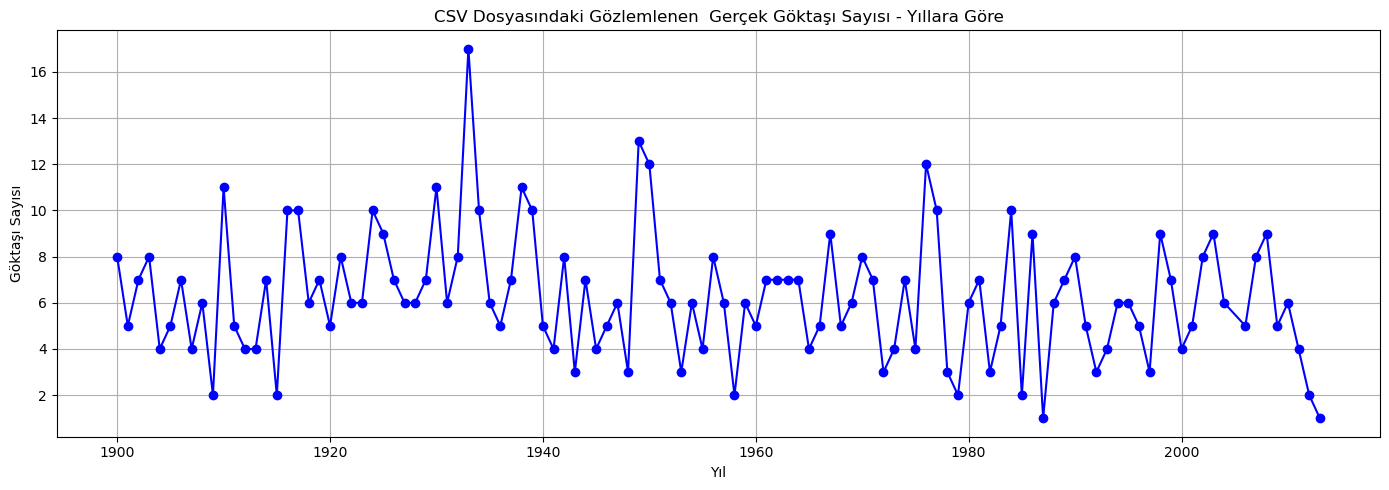

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV'den veri oku
df = pd.read_csv("meteorite-landings.csv")

# Yıl sütununu temizle
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df = df.dropna(subset=["year"])
df["year"] = df["year"].astype(int)

# Sadece 'Fell' ve 1900 sonrası veriler
df = df[(df["fall"] == "Fell") & (df["year"] >= 1900)]

# Her yıl kaç göktaşı düştü (yıllık count)
yearly_counts = df.groupby("year").size()

plt.figure(figsize=(14, 5))
plt.plot(yearly_counts.index, yearly_counts.values, color='blue', marker='o')
plt.title("CSV Dosyasındaki Gözlemlenen  Gerçek Göktaşı Sayısı - Yıllara Göre")
plt.xlabel("Yıl")
plt.ylabel("Göktaşı Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
print("yillik_sayilar index:", yillik_sayilar.index)
print("egitim_yillari index:", egitim_yillari.index)
print("test_yillari index:", test_yillari.index)


yillik_sayilar index: PeriodIndex(['1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907',
             '1908', '1909',
             ...
             '2003', '2004', '2006', '2007', '2008', '2009', '2010', '2011',
             '2012', '2013'],
            dtype='period[Y-DEC]', name='yil', length=113)
egitim_yillari index: PeriodIndex(['1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907',
             '1908', '1909',
             ...
             '2003', '2004', '2006', '2007', '2008', '2009', '2010', '2011',
             '2012', '2013'],
            dtype='period[Y-DEC]', name='yil', length=113)
test_yillari index: PeriodIndex([], dtype='period[Y-DEC]', name='yil')


In [10]:
print(yillik_sayilar.index)
print(yillik_sayilar.tail(20))   # Son 20 yılı ve değerleri göster


PeriodIndex(['1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907',
             '1908', '1909',
             ...
             '2003', '2004', '2006', '2007', '2008', '2009', '2010', '2011',
             '2012', '2013'],
            dtype='period[Y-DEC]', name='yil', length=113)
yil
1993    4
1994    6
1995    6
1996    5
1997    3
1998    9
1999    7
2000    4
2001    5
2002    8
2003    9
2004    6
2006    5
2007    8
2008    9
2009    5
2010    6
2011    4
2012    2
2013    1
Freq: Y-DEC, dtype: int64


Eğitim yılları: PeriodIndex(['1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907',
             '1908', '1909',
             ...
             '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2006',
             '2007', '2008'],
            dtype='period[Y-DEC]', name='yil', length=108)
Test yılları: PeriodIndex(['2009', '2010', '2011', '2012', '2013'], dtype='period[Y-DEC]', name='yil')
      Gerçek    Tahmin
yil                   
2009       5  6.387164
2010       6  6.233470
2011       4  6.224429
2012       2  6.223898
2013       1  6.223866
Test dönemi RMSE: 3.227


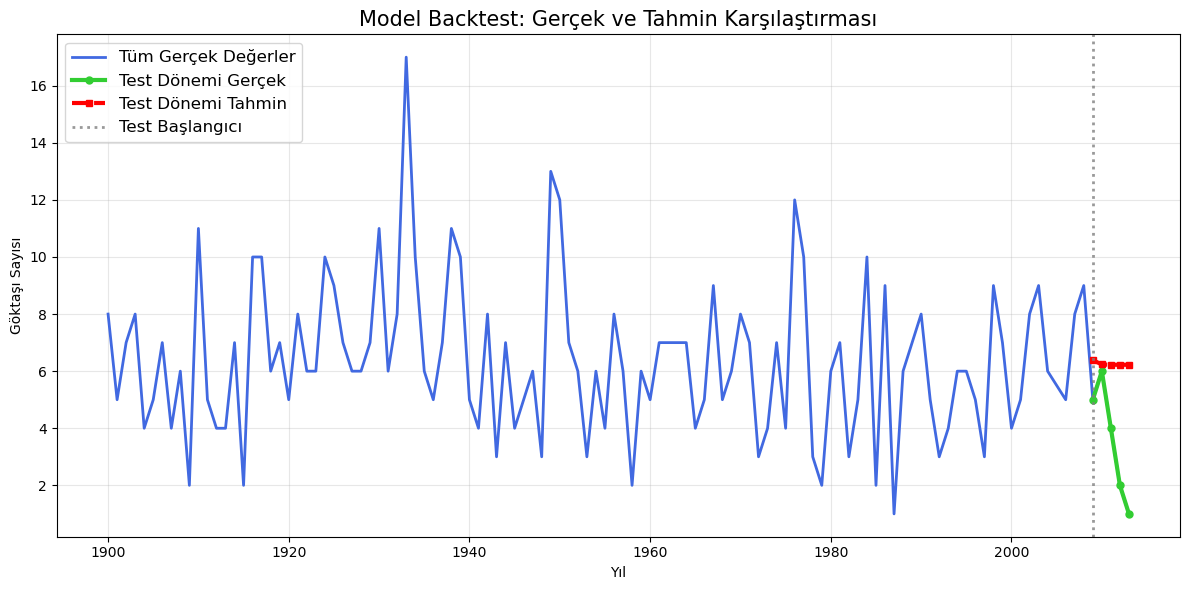

In [15]:
c

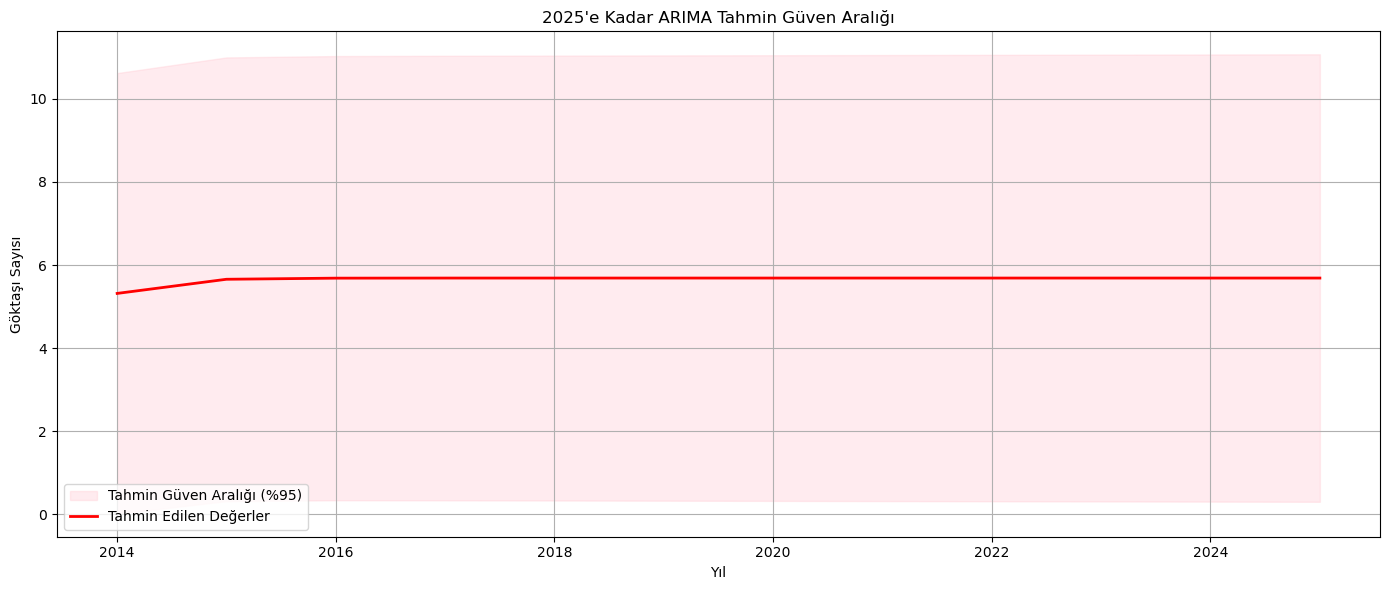

In [4]:
# --- Sadece güven aralığı için ikinci grafik ---
tahmin_obj = model_sonuc.get_forecast(steps=tahmin_sayisi) #şu yıllar için tahmin yapacağım get forecast
conf_int = tahmin_obj.conf_int() #O tahminlerin alt sınırı ve üst sınırını veriyor yani güven aralığı

plt.figure(figsize=(14, 6))
plt.fill_between(    #çizgi tahmin edilen pembe güven aralığı
    tahmin.index.to_timestamp(),
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="pink",
    alpha=0.3,
    label="Tahmin Güven Aralığı (%95)"
)
plt.plot(tahmin.index.to_timestamp(), tahmin.values, color="red", label="Tahmin Edilen Değerler", linewidth=2)

plt.title("2025'e Kadar ARIMA Tahmin Güven Aralığı")
plt.xlabel("Yıl")
plt.ylabel("Göktaşı Sayısı")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
